In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [3]:
data=pd.read_csv("exchange_rate.csv", parse_dates=True)
data.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [7]:
data['Ex_rate'].dtype

dtype('float64')

In [9]:
data['Ex_rate'].isna().sum()

0

In [11]:
data["date"] = pd.to_datetime(data["date"], format='%d-%m-%Y %H:%M')

In [13]:
data.set_index("date",inplace=True)

In [15]:
data

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


In [17]:
data.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


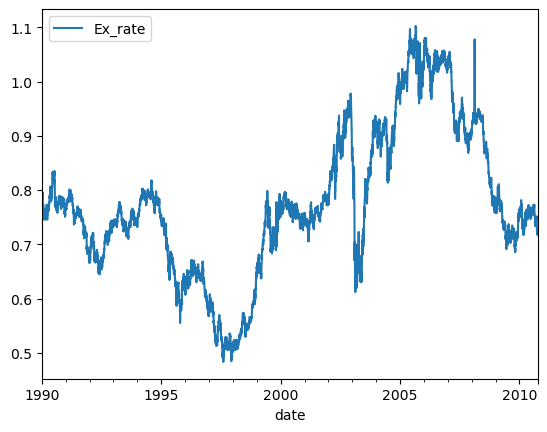

In [19]:
data.plot()
plt.show()

array([[<Axes: title={'center': 'Ex_rate'}>]], dtype=object)

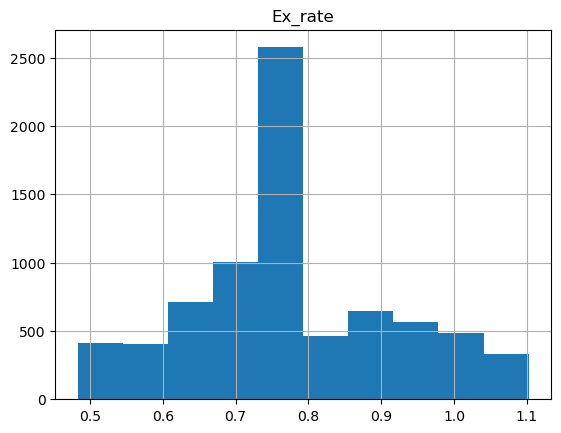

In [21]:
data.hist()

<Axes: ylabel='Density'>

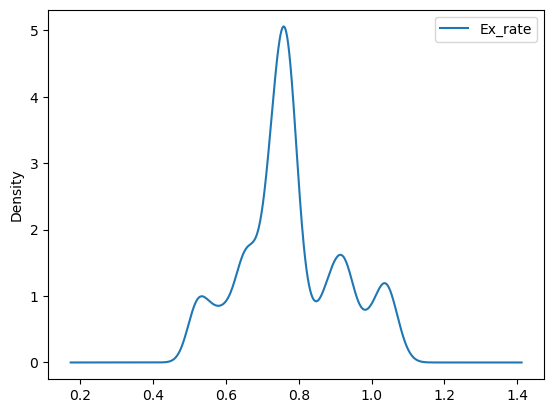

In [23]:
data.plot(kind="kde")

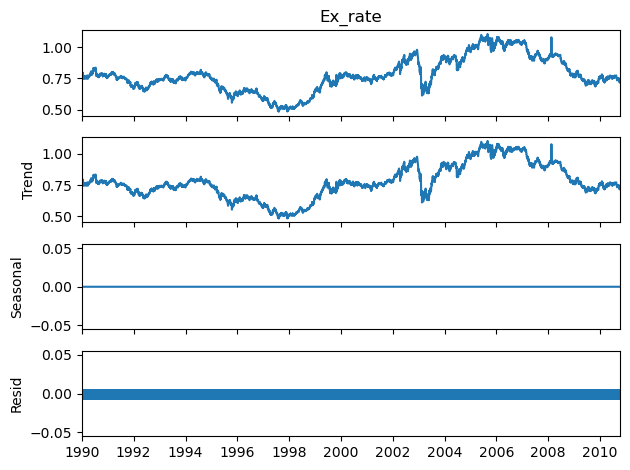

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(data.Ex_rate,period=1)
decompose_ts_add.plot()
plt.show()

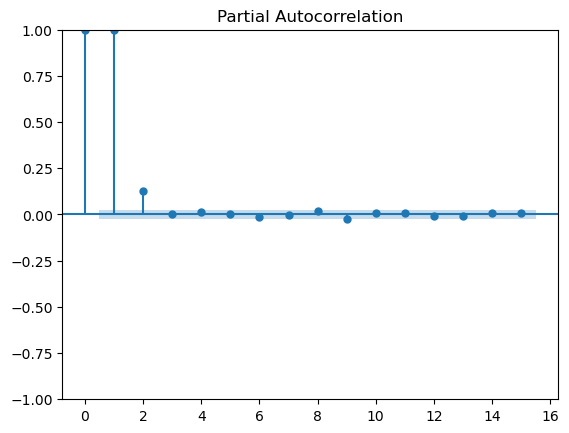

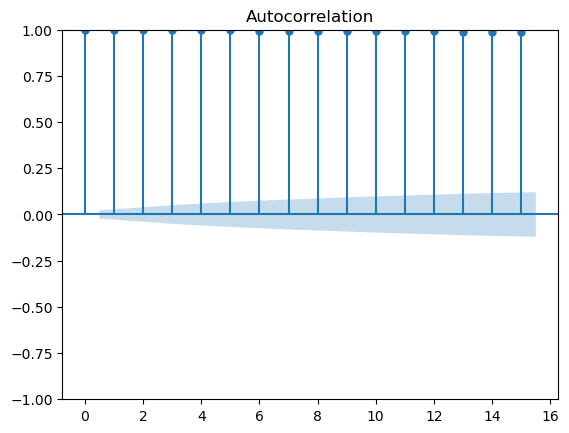

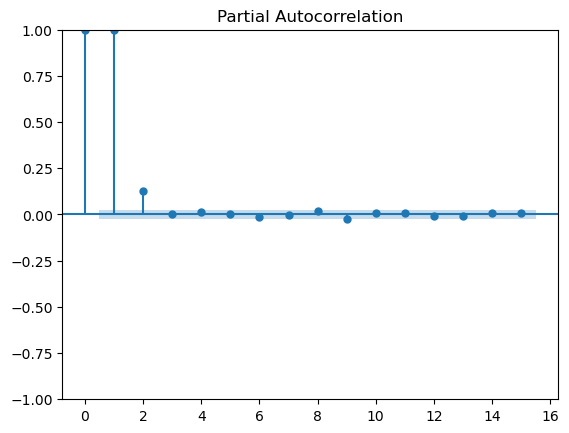

In [26]:
#ACF plot

import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(data.Ex_rate,lags=15)
tsa_plots.plot_pacf(data.Ex_rate,lags=15)

In [28]:
# separate out a validation dataset
split_point = len(data) - 500
dataset, test_data = data[0:split_point], data[split_point:]
print('Dataset %d, test_data %d' % (len(dataset), len(test_data)))

Dataset 7088, test_data 500


In [31]:
history =[]
for x in dataset["Ex_rate"]:
    history.append(x)
history
val=[]
for x in test_data["Ex_rate"]:
    val.append(x)


In [33]:
test_data.Ex_rate

date
2009-05-29    0.734592
2009-05-30    0.733272
2009-05-31    0.731904
2009-06-01    0.731904
2009-06-02    0.720747
                ...   
2010-10-06    0.718494
2010-10-07    0.721839
2010-10-08    0.723197
2010-10-09    0.720825
2010-10-10    0.720825
Name: Ex_rate, Length: 500, dtype: float64

In [35]:
test_data.dtypes

Ex_rate    float64
dtype: object

In [37]:
len(val)

500

In [39]:
len(history)

7088

In [45]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ADF Statistic: -1.6649941807381343
p-value: 0.44923273535979974
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


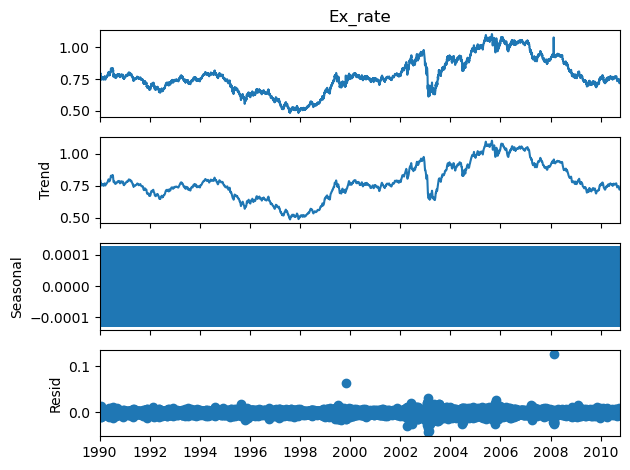

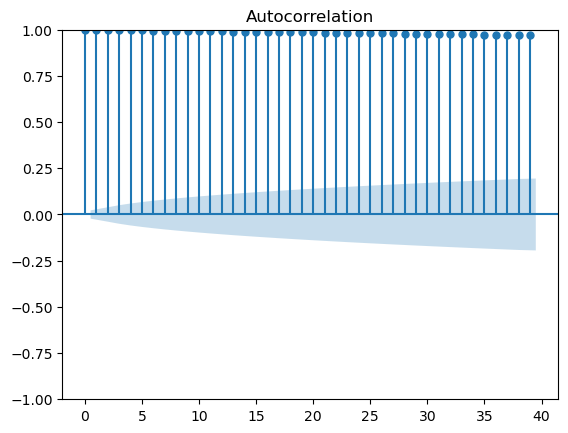

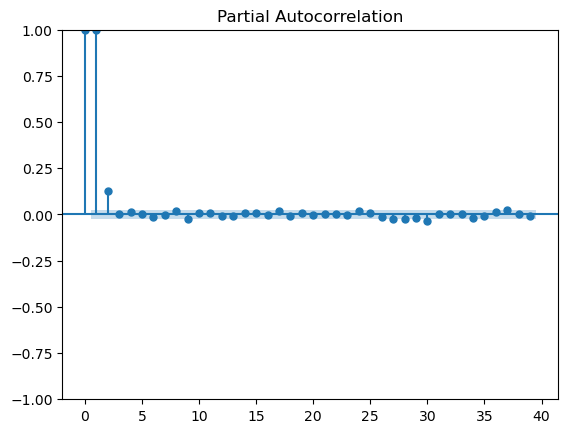

C:\Users\bojja\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bojja\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bojja\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 0)   Log Likelihood               28054.159
Date:                Tue, 10 Sep 2024   AIC                         -56104.319
Time:                        10:42:48   BIC                         -56090.450
Sample:                    01-01-1990   HQIC                        -56099.559
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -64.439      0.000      -0.135      -0.127
sigma2      3.595e-05   9.94e-08    361.720      0.000    3.58e-05    3.61e-05
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [91]:
# Check stationarity using ADF test
result = adfuller(data['Ex_rate'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Decompose the time series into trend, seasonality, and residual components
decomposition = seasonal_decompose(data['Ex_rate'], model='additive')
decomposition.plot()
plt.show()

# Plot ACF and PACF to determine AR and MA terms
plot_acf(data['Ex_rate'])
plt.show()
plot_pacf(data['Ex_rate'])
plt.show()

# Fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Ex_rate'], order=(1, 1, 0))  # Adjust order as needed based on ACF and PACF
results = model.fit()
print(results.summary())

# Forecast future values
forecast_arima = results.forecast(steps=7588)  # Adjust steps as needed
print(forecast_arima)

In [53]:
pip install pmdarima


   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
    --------------------------------------- 10.2/625.1 kB ? eta -:--:--
   - ------------------------------------- 30.7/625.1 kB 660.6 kB/s eta 0:00:01
   --- ----------------------------------- 61.4/625.1 kB 656.4 kB/s eta 0:00:01
   ----- --------------------------------- 81.9/625.1 kB 657.6 kB/s eta 0:00:01
   ----- --------------------------------- 92.2/625.1 kB 438.1 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/625.1 kB 547.6 kB/s eta 0:00:01
   ------- ------------------------------ 122.9/625.1 kB 400.9 kB/s eta 0:00:02
   ---------- --------------------------- 174.1/625.1 kB 499.5 kB/s eta 0:00:01
   ---------- --------------------------- 174.1/625.1 kB 499.5 kB/s eta 0:00:01
   ---------- --------------------------- 174.1/625.1 kB 499.5 kB/s eta 0:00:01
   ---------- --------------------------- 174.1/625.1 kB 499.5 kB

In [55]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Fit Auto-ARIMA model
model = auto_arima(data['Ex_rate'], start_p=1, start_q=1, max_p=3, max_q=3, m=12, seasonal=True, stepwise=True)

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 7588
Model:               SARIMAX(1, 1, 0)   Log Likelihood               28054.159
Date:                Tue, 10 Sep 2024   AIC                         -56104.319
Time:                        10:29:27   BIC                         -56090.450
Sample:                    01-01-1990   HQIC                        -56099.559
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -64.439      0.000      -0.135      -0.127
sigma2      3.595e-05   9.94e-08    361.720      0.000    3.58e-05    3.61e-05
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [85]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

# Choose an appropriate smoothing model based on time series characteristics
# For example, Simple Exponential Smoothing for stationary data
model = SimpleExpSmoothing(data['Ex_rate'])

# Fit the model and forecast future values
results = model.fit(smoothing_level=0.2)  # Adjust smoothing_level as needed
forecast_smoothing = results.forecast(steps=7588)
print(forecast_smoothing)

2010-10-11    0.721567
2010-10-12    0.721567
2010-10-13    0.721567
2010-10-14    0.721567
2010-10-15    0.721567
                ...   
2031-07-16    0.721567
2031-07-17    0.721567
2031-07-18    0.721567
2031-07-19    0.721567
2031-07-20    0.721567
Freq: D, Length: 7588, dtype: float64


C:\Users\bojja\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bojja\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have the actual values (y_true) and predicted values from both models (y_pred_arima, y_pred_exp_smoothing)

# Evaluate ARIMA model
mae_arima = mean_absolute_error(data['Ex_rate'], forecast_arima)
mse_arima = mean_squared_error(data['Ex_rate'], forecast_arima)

# Evaluate Exponential Smoothing model
mae_exp_smoothing = mean_absolute_error(data['Ex_rate'], forecast_smoothing)
mse_exp_smoothing = mean_squared_error(data['Ex_rate'], forecast_smoothing)

print("ARIMA Model:")
print("MAE:", mae_arima)
print("MSE:", mse_arima)

print("\nExponential Smoothing Model:")
print("MAE:", mae_exp_smoothing)
print("MSE:", mse_exp_smoothing)

ARIMA Model:
MAE: 0.1120896705324196
MSE: 0.021815348934538736

Exponential Smoothing Model:
MAE: 0.11179881791845254
MSE: 0.021732566588658807
